WSPR-Signal-Propagation-Analysis

The code below each part of this question is related to that question and was used to answer it and/or contains the answers for that question.

Loading the wspr.csv data set into a data frame. 

Are there any missing values? 

    Answer: yes there is one missing value located in the 'snr' column. 


Performing any necessary data imputation on numerical data in the data frame...

I have imputated the row 100016 'snr' column value with the mean of the 'snr' column values.

In [3]:
wspr <- read.csv('/public/bmort/R/wspr.csv')
head(wspr, 5)

id,time,band,rx_sign,rx_lat,rx_lon,rx_loc,tx_sign,tx_lat,tx_lon,tx_loc,distance,azimuth,rx_azimuth,frequency,power,snr,drift,version,code
<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<int>
6554621574,2023-11-01 00:00:00,10,01231,41.479,164.958,RN21,0TXWN1,41.479,164.958,RN21,0,0,0,10139594,13,0,0,wkr1,1
6554625343,2023-11-01 00:00:00,10,WB6JHI,37.229,-121.958,CM97af,KA7FTP,40.479,-111.042,DN40,1011,253,65,10140171,23,-17,0,2.2.0-rc15,1
6554625345,2023-11-01 00:00:00,10,WB6JHI,37.229,-121.958,CM97af,KJ6WSM,38.771,-121.375,CM98hs,179,197,16,10140276,23,-21,0,2.2.0-rc15,1
6554625385,2023-11-01 00:00:00,10,VE5CRL,52.479,-107.042,DO62,KC3SDJ,40.521,-80.208,EN90vm,2425,312,112,10140107,23,-27,0,2.6.1,1
6554625387,2023-11-01 00:00:00,10,KD6EKQ,32.854,-117.208,DM12ju,KA7FTP,40.479,-111.042,DN40,1010,215,31,10140206,23,-22,0,0.9_r5162,1


In [34]:
sum(is.na(wspr))

[1] 1

In [35]:
colSums(is.na(wspr))

id       time       band    rx_sign     rx_lat     rx_lon     rx_loc 
         0          0          0          0          0          0          0 
   tx_sign     tx_lat     tx_lon     tx_loc   distance    azimuth rx_azimuth 
         0          0          0          0          0          0          0 
 frequency      power        snr      drift    version       code 
         0          0          1          0          0          0

In [36]:
mean(wspr$snr, na.rm = TRUE)

[1] -14.75883

In [37]:
rows_with_na <- apply(is.na(wspr), 1, any)
which(rows_with_na)

[1] 100016

In [38]:
wspr[100016,'snr'] = mean(wspr$snr, na.rm = TRUE)

In [39]:
wspr[100016,'snr']

[1] -14.75883

Lets analyze this data 



i) How do the ranges of the values in the columns with numerical data compare?

    First of all, the range of the id column is over 2.4 million, which is very interesting because there are only 300 thousand rows, so it appears this dataset might be a subset of another or that the ids are inconsistent.

    The frequency column range has an exceptionally large range (over 2 billion), suggesting that the values in this column vary widely and might span several orders of magnitude. This could be indicative of very high-frequency measurements or a wide variety of frequencies recorded.

    The rx_lat.Range and tx_lat.Range show the range of latitudes, and rx_lon.Range and tx_lon.Range show the range of longitudes for the receiving (rx) and transmitting (tx) stations, respectively. Latitude ranges from -90 to 90, and longitude from -180 to 180, but the ranges are within a smaller subset of these values, suggesting limited geographical coverage.

    The azimuth.Range and rx_azimuth.Range have the same range of 359, which is one less than the full possible range of 360 degrees in a circle, suggesting that the azimuth measurements cover almost the full possible range.

    Others like power.Range and snr.Range have smaller, more moderate ranges. These columns likely represent more constrained measurements, such as power levels or quality of signal reception.
    
    When comparing the magnitude and ranges, it's clear that not all columns have similar magnitudes or ranges. Which is fine considering that this dataset contains different types of measurements.

ii) Does each column of numerical data have similar magnitudes and ranges? 

    Each column has very different magnitudes and ranges, which is normal because some of the measured values have limited range, as mentioned in (i) when discussing longitudes, latitudes and azimuth. While other columns have extremely large values such as frequency and id. 

iii) Are there any outliers?
        id       time       band    rx_sign     rx_lat     rx_lon     rx_loc 
      TRUE         NA       TRUE         NA       TRUE       TRUE         NA 
   tx_sign     tx_lat     tx_lon     tx_loc   distance    azimuth rx_azimuth 
        NA       TRUE       TRUE         NA       TRUE      FALSE      FALSE 
 frequency      power        snr      drift    version       code 
      TRUE       TRUE       TRUE       TRUE         NA       TRUE 
      
      As we can see here, the only columns with no outliers are 'azituth' and 'rx_azimuth'

In [40]:
summary(wspr)

       id                             time             band        
 Min.   :6.555e+09   2023-11-01 00:28:00:  9352   Min.   :  -1.00  
 1st Qu.:6.555e+09   2023-11-01 00:10:00:  8315   1st Qu.:   7.00  
 Median :6.555e+09   2023-11-01 00:06:00:  8274   Median :  10.00  
 Mean   :6.555e+09   2023-11-01 00:58:00:  8198   Mean   :  11.58  
 3rd Qu.:6.555e+09   2023-11-01 00:22:00:  8107   3rd Qu.:  14.00  
 Max.   :6.557e+09   2023-11-01 00:30:00:  7910   Max.   :2400.00  
                     (Other)            :249844                    
      rx_sign           rx_lat           rx_lon             rx_loc      
 KFS      :  4587   Min.   :-70.65   Min.   :-157.958   FN30lu :  6035  
 EA8/DF4UE:  4064   1st Qu.: 38.10   1st Qu.:-105.958   CM87tj :  4587  
 KA7OEI/Q :  3850   Median : 41.77   Median : -79.875   DN31uo :  4278  
 KPH      :  3753   Mean   : 41.07   Mean   : -60.402   IL38bp :  4064  
 WA2TP    :  3652   3rd Qu.: 47.69   3rd Qu.:   0.292   JN47wk :  3975  
 KK6PR    :  3428 

In [41]:
sapply(wspr, function(x) if(is.numeric(x)) c(Range = diff(range(x, na.rm = TRUE))) else 'NOT APPLICABLE')

id.Range             time       band.Range          rx_sign 
       "2402141" "NOT APPLICABLE"           "2401" "NOT APPLICABLE" 
    rx_lat.Range     rx_lon.Range           rx_loc          tx_sign 
           "139"        "333.833" "NOT APPLICABLE" "NOT APPLICABLE" 
    tx_lat.Range     tx_lon.Range           tx_loc   distance.Range 
           "177"            "352" "NOT APPLICABLE"          "18925" 
   azimuth.Range rx_azimuth.Range  frequency.Range      power.Range 
           "359"            "359"     "2399932191"            "103" 
       snr.Range      drift.Range          version       code.Range 
            "82"              "8" "NOT APPLICABLE"              "9"

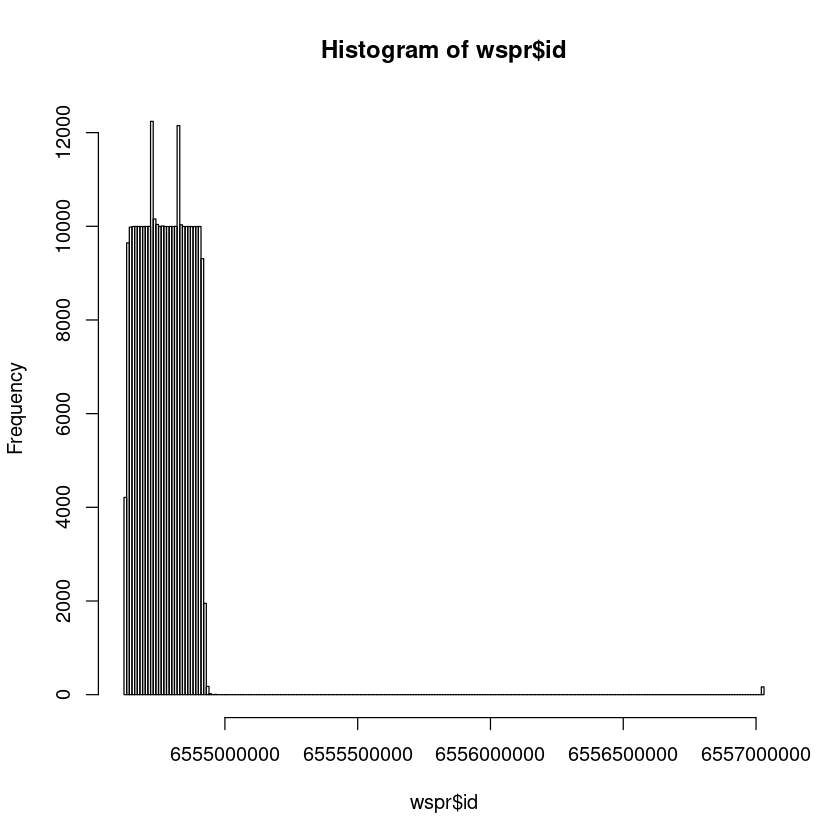

In [42]:
hist(wspr$id, breaks=sqrt(length(wspr$id))/2)

In [43]:
has_outliers <- function(x) {
  if(is.numeric(x)) {
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    return(any(x < lower_bound | x > upper_bound))
  } else {
    return(NA) # Non-numeric columns cannot have numeric outliers, so we'll return NA here
  }
}

sapply(wspr, has_outliers)

id       time       band    rx_sign     rx_lat     rx_lon     rx_loc 
      TRUE         NA       TRUE         NA       TRUE       TRUE         NA 
   tx_sign     tx_lat     tx_lon     tx_loc   distance    azimuth rx_azimuth 
        NA       TRUE       TRUE         NA       TRUE      FALSE      FALSE 
 frequency      power        snr      drift    version       code 
      TRUE       TRUE       TRUE       TRUE         NA       TRUE

C. How many unique values are in each of the following columns: band, rx_sign, and
tx_sign?

answer:

'band': 23

'rx_sign': 891

'tx_sign': 1070

In [44]:
length(unique(wspr$band))

[1] 23

In [45]:
length(unique(wspr$rx_sign))

[1] 891

In [46]:
length(unique(wspr$tx_sign))

[1] 1070

I will find some specific cases to get more familiar with the data:
What is the average distance (in km) between the transmitting station and the
receiving station for signals that have a power less than 30 dBm?

answer:

mean = 2057.33472735626

In [47]:
distance_subset <- wspr[wspr$power < 30, 'distance']
mean(distance_subset)

[1] 2057.335

E. What is the call sign (rx_sign) of the receiving station that received the most signal
transmissions on the 14 MHz band (i.e. band = 14)?

answer:

'EA8/DF4UE'

In [48]:
band_subset <- (wspr[wspr$band == 14, 'rx_sign'])

In [49]:
length(band_subset)

[1] 73667

In [51]:
#unique(band_subset)

In [52]:
length(unique(band_subset))

[1] 438

In [53]:
tab <- tabulate(match(band_subset, unique(band_subset)))
tab

[1]   45  627  237  120  460    8    7  119   13   48  240  112  285  123   16
 [16]  218   60  282   48  382   67   80  612   12  210    7   84   19  588  626
 [31]  157  143  324  228  609  635  361   71  217   48  116  611  301  535  749
 [46]  626    7  717  138  147  157   32 1123  120   84   96  577    2  177  616
 [61]   99  817   90  209   14   46   18    5  133  444   12  109  111   55  659
 [76]  266   53  258  229   35  491  445  115  445   97  199    6  346   68  310
 [91]   11  241   17   69   39   44  458  205  746  136  142   11  129  110  362
[106]  109  364  288  595   75   23  323   36  537  416  592   89    7   47  351
[121]  387   17  437   14  311  728  476   11  586   45   55  395   44  424   22
[136]  415  523  346  955  142  260  622   31  357  113  316  132   52   48  436
[151]   37  222   13  855  865 1354 1012 1054  711  884  237    8   69   81  118
[166]  633   77  220  690  801  545   48   41  892   22 1170 1337  549  775  321
[181]  574  943  312   17  112  102  928  967   65   54  178  319   59  260   66
[196]  130   65  197  356  169  292   33  249   35  249   28   18  121  268  226
[211]  267  318   28   91  584   48  372  910  461   92  112  199  267    9   59
[226]   30  105   25   32   54   23   18  217   11   31    9   20   47   28   32
[241]  272   96  106   59  189  517   28   57   30  162  294    9   14    9  306
[256]   17   87   57  130    2    4   38   24   84   23   17   31  164   15   32
[271]    4   16   14   16  204   98   24   17   16  241   71   40   45   51   32
[286]    8  689    4    4    8    2    3    7    4    4   24   29   21    4    3
[301]    8    5    3   11    4  183  125   42    4    9    5    9    3    4   11
[316]    4    5   23    7    4   25    8   38   34    6    4   15   28    4   41
[331]    2    2  188    5    1   36   71   36   35    2   23   14    4   99   83
[346]   22    5   73   18    5    3   65   17  289   60    1   70   15   29   77
[361]   76    8   23   69  133    9    9  120  139   66   18   21   18    5   60
[376]   19   10   54   77  152   30   24   16   23   25  171   14    7  349    8
[391]   25    4    3    6    5    9   63    9   16    1    7    7  223    2    2
[406]    1   15   34    2    4    7   38    1    2  242    1    1   10    2    2
[421]    1    4   51   33    2    1    1    1    1    1    1    1    2    1    1
[436]    1    1    1

In [54]:
most_freq <- max(tab)
most_freq

[1] 1354

In [55]:
mode_values <- unique(band_subset)[tab == most_freq]
mode_values

[1] EA8/DF4UE
891 Levels: 01230 01231 14OA159 161OS344 2E0DSS 2E0ILY/KIWI 2E0PYB ... ZS6JGL

Now I will partition the WSPR data set so that a random sample of 80% of the data will be used for training and 20% will be used for testing your machine learning model. 

In [56]:
library(caret)

In [57]:
training_size <- floor(0.80 * nrow(wspr))
training_indices <- sample(seq_len(nrow(wspr)), size = training_size)
training_set <- wspr[training_indices, ]

testing_set <- wspr[-training_indices, ]

Now I will generate a linear regression model to predict the signal-to-noise ratio from the distance, frequency, and power.

In [58]:

model_formula <- snr ~ distance + frequency + power

#Training the Model
linear_model <- lm(model_formula, data = training_set) # Use your training dataset here

#Summary of the Model
summary(linear_model)



Call:
lm(formula = model_formula, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.879  -6.374  -0.894   5.475  59.252 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.026e+01  6.726e-02 -301.25  < 2e-16 ***
distance    -1.073e-03  8.223e-06 -130.51  < 2e-16 ***
frequency    1.353e-09  2.987e-10    4.53 5.91e-06 ***
power        2.988e-01  2.442e-03  122.37  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.662 on 239996 degrees of freedom
Multiple R-squared:  0.1049,	Adjusted R-squared:  0.1049 
F-statistic:  9376 on 3 and 239996 DF,  p-value: < 2.2e-16


I will Use the 20% of the data set aside for testing to determine the accuracy of the
model. Choosing an appropriate accuracy metric. 

I will be answering the following:

i) How well does the model predict
the signal to noise values from distance, frequency, and power?

ii) Why is
the accuracy is good or poor

In [59]:
predictions <- predict(linear_model, newdata = testing_set)

actual_snr <- testing_set$snr

mse <- mean((actual_snr - predictions)^2)

rmse <- sqrt(mse)

print(paste("MSE:", mse))
print(paste("RMSE:", rmse))


[1] "MSE: 74.9414594482498"
[1] "RMSE: 8.65687353772999"


i) answer:

The RMSE here lets us know that that the model’s errors are somewhat high, given that the RMSE is more than half of the mean SNR value. This could be problematic in a practical sense because, in the context of radio signal propagation, such deviations might lead to incorrect conclusions or expectations about signal quality.

With the mean SNR at around 14, and considering the nature of the data and the importance of accurate predictions for SNR, the accuracy of the model might not be as good as needed. If the SNR values typically do not vary widely (e.g., if they usually range from 10 to 20), an RMSE of 8.66 could be too large relative to this range.

ii) answer:

Given the complexity of atmospheric conditions affecting signal propagation, it's possible that linear regression might not be able to capture all the necessary patterns and might be too simplistic a model. Many other factors included in the dataset that are not just power distance and frequency can introduce a lot of variability into the SNR.

Variables including Azimuth, time, drift, and the geographical locations and almost all the other features in the data set would help make better predictions. Using only 3 will make sure that the values are most accurate.


It is also worth considering whether there is a non-linear relationship between the predictors and the SNR or if there are interactions between predictors that a linear model does not account for. In such cases, a different modeling approach, like polynomial regression or a non-linear model, might yield more accurate predictions.

I. What is the predicted signal to noise value for a receiver that is located 2,000 km
from a transmitter that uses a frequency of 14,030,000 Hz and a power level of 31
dBm? How confident are you in the answer? Explain your reasoning. 

answer:
snr = -13.1301119878796

I'm not very confident in this answer, the features used to predict this are very limited since we are only using 3 features. Going back to the error we see that this model has very high error when predicting signal-to-noise based on power, frequency and distance.

However, what makes me a little more confident about this is that the values of the features seem to be within the ranges of the original dataset, which increases the reliability of the predictions.

In [60]:
new_data <- data.frame(distance = 2000, frequency = 14030000, power = 31)

predict(linear_model, newdata = new_data)



1 
-13.12493